# Normalizing Flows
> For the Fall 2024 course: *Machine Learning in Physics*<br>
> Created: Aug. 14, 2024 Harrison B. Prosper

## Introduction
Let $p(x)$ and $q(y)$ be probability densities, where $x, y \in \mathbb{R}^D$, then the following necessarily holds 
\begin{align}
    p(x) dx & = q(y) dy .
\end{align}
Given a **bijection** $f : x \rightarrow y$, that is, a one-to-one invertible function, which we'll write as $y = f(x)$, then
\begin{align}
    p(x) & = q(y) \left| \text{det} \, \nabla_x f  \right| , \text{ or, equivalently, }\\
    \log p(x) & = \log q(y) + \log \left |\text{det} \, J \right|,
\end{align}
where $J = \nabla_x f$ is the Jacobian maxtrix of the transformation $y = f(x)$. **Normalizing flows**[1] are a set of methods that model the function $y = f(x)$ as a  conjunction
\begin{align}
    f & = f_n \circ f_{n-1} \circ \cdots f_2 \circ f_1, 
\end{align}
of bijections $f_i$, $i =1,\cdots, n$, which can expressed recursively as
\begin{align}
        y_{n}  & = f_{n}(y_{n-1}), \quad y_n \equiv y, \\
        y_{n-1}  & = f_{n-1}(y_{n-2}), \\
             & \vdots \\
        y_1  & = f_1(y_0), \quad y_0 \equiv x .
\end{align}
The bijection $f$ can be conceptualized as a "flow" from the point $x$ to the point $y$ in $\mathbb{R}^D$.
Noting that $\text{det} \, J = \prod_{i=1}^n \text{det} \, J_i $, where $J_i$ is the Jacobian of the transformation $y_i = f_i(y_{i-1})$, and defining $y_n \equiv y$ and $y_0 \equiv x$, we can write 
\begin{align}
    p(x) & = q(y) \left| \text{det} \, J \right| , \text{ or, equivalently, }\\
    \log p(x) & = \log q(y) + \sum_{i=1}^n \log \left |\text{det} \, J_i \right| .
\end{align}
The key to mapping from $\log q(y)$ to $\log p(x)$ is computing the sequence of Jacobian determinants. Usually, $q(y)$ is taken to be a diagonal $D$-dimensional, zero mean, unit variance normal, hence the moniker "normalizing" flow.

## Real-valued Non-volume Preserving Flows (R-NVP)

Many proposals exist for normalizing flows. In this tutorial, we implement the flow introduced by Dinh et al.[2]. For a given function $f_i$, let $x \in \mathbb{R}^D$ be a point in the domain of $f_i$ and $y \in \mathbb{R}^D$ be a point in its codomain, which, because $f_i$ is bijective, coincides with the image of $f_i$. This is just a mathy way of saying that $y = f_i(x)$ such that for every $x$ there is a single $y$ and for every $y$ there is a single $x$. 

The key and clever innovation [2] is to split the vector $x$ into two sub-vectors $x_A = (x_1, \cdots, x_d)$ and $x_B = (x_{d+1},\cdots, x_D)$ of dimensions $d$ and $D-d$, respectively, and do likewise for $y$, which is split into the vectors $y_A$ and $y_B$, also of dimensions $d$ and $D-d$, respectively. The components, $y_j = f_{i, j}(x)$, of the $D$-dimensional function $f_i$ are given by
\begin{align}
 y_j = f_{i, j}(x) &= 
     \begin{cases}
        x_j             & j = 1, \cdots, d, \\
        x_j \exp[s_{j-d}(x_1,\cdots,x_d)] + t_{j-d}(x_1,\cdots,x_d) &  j = d+1, \cdots, D,       
    \end{cases} 
\end{align}
where the two sets of $D-d$ functions $s_j (x_1,\cdots, x_d)$ and $t_j(x_1,\cdots,x_d)$ need to be determined.
The above can be written compactly as
\begin{align}
    y_A & = x_A, \\
    y_B & = x_B \odot \exp[s(x_A)] + t(x_A),
\end{align}
where $\odot$ denotes the Hadamard product [3], that is, an elementwise product, and where it is understood that $\exp(*)$ is also applied elementwise, that is, $\exp(s(x_A))$ is a vector with components $\exp[s_1(x_A)], \cdots, \exp[s_{D-d}(x_A)]$ and $s, t : \mathbb{R}^d \rightarrow \mathbb{R}^{D-d}$ are functions to be determined.

The form of $f_i$ is chosen to render its inverse $f_i^{-1}$ is easy to compute,
\begin{align}
    x_A & = y_A, \\
    x_B & = [y_B - t(y_A)] \odot \exp[-s(y_A)] ,
\end{align}
as well as its Jacobian,
\begin{align}
    J_i = \begin{pmatrix}
            \mathbb{1}_d & 0 \\
            \nabla_{x_A} y_B  &  \exp[s(x_A)]
        \end{pmatrix} ,
\end{align}
which yields an easily computed log determinant, 
\begin{align}
\log|\text{det} \, J_i| & = \sum_{j=1}^{D-d} s_j(x_A) .
\end{align}
Since the calculations of $f_i^{-1}$ and $\log |\text{det} \, J_i|$ do not depend on the details of the functions $s(x_A)$ and $t(x_A)$, the latter can be arbitrarily complicated; for example, they can be modeled with deep neural networks.

## Tutorial
In this tutorial, we use a normalizing flow to map between a 2D spiral distribution and a 2D, zero mean, unit variance normal. The tutorial is inspired by the blogs of Sebastian Callh[4],
Brennan Gebotys[5], and the excellent course by François Fleuret[6]. We largely follow the notation of the original paper by Dinh et al.[2].


## References
  1. Danilo Jimenez Rezende, and Shakir Mohamed, *Variational Inference with Normalizing Flows*, https://arxiv.org/abs/1505.05770
  2. Laurent Dinh, Jascha Sohl-Dickstein, and Samy Bengio, *Density Estimation using Real NVP*, https://arxiv.org/abs/1605.08803
  3. https://en.wikipedia.org/wiki/Hadamard_product_(matrices)
  4. https://sebastiancallh.github.io/post/affine-normalizing-flows/
  5. https://gebob19.github.io/normalizing-flows/
  6. https://fleuret.org/dlc/


In [1]:
import os, sys
sys.path.append('../../python')

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib as mp
import matplotlib.pyplot as plt

# standard research-level machine learning toolkit from Meta (FKA: FaceBook)
import torch
import torch.nn as nn
from torch.distributions.multivariate_normal import MultivariateNormal

# module to access data in Hierarchical Data Format (HDF or H5 format)
import h5py

# a simple time left function written by HBP
from lossmonitor import TimeLeft

## Constants

In [2]:
LOSS_FILE = 'losses.csv'
DICT_FILE = 'model.pth'
PLOT_FILE = 'results.png'
TIMELEFT_FILE = 'timeleft.txt'

# update fonts
FONTSIZE = 12
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set usetex = False if LaTex is not 
# available on your system or if the 
# rendering is too slow
mp.rc('text', usetex=True)

# set random number seed
if 'SEED' in os.environ:
    SEED = int(os.environ['SEED'])
else:
    SEED = 42
print(f'SEED: {SEED:d}')

rnd  = np.random.RandomState(SEED)

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'\n\tComputational device: {str(DEVICE):4s}\n')

SEED: 42

	Computational device: cpu 



## Load Data

In [3]:
filename = '../data/spiral.h5'

f = h5py.File(filename, "r")

X0 = np.array(f['X0'])

X0.shape

(100000, 2)

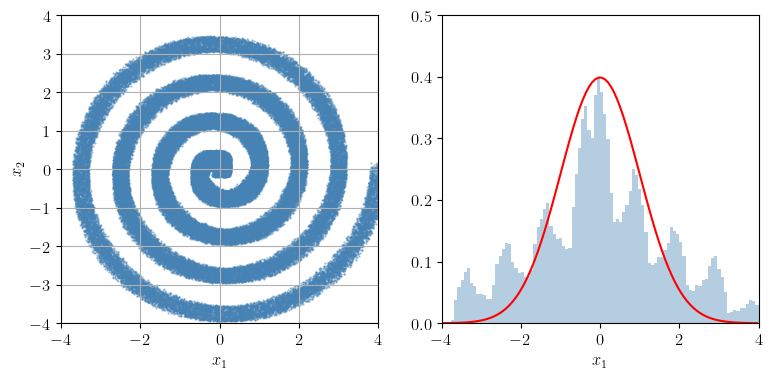

In [4]:
def plot_data(d, xmin=-4, xmax=4, ymin=-4, ymax=4, filename='fig_spiral.png'):

    x1, x2 = d[:, 0], d[:, 1]
    
    fig = plt.figure(figsize=(9, 4))
    fig.tight_layout()
    
    ax  = fig.add_subplot(1, 2, 1)
    
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(r'$x_1$')
    
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel(r'$x_2$')
    
    ax.scatter(x1, x2, s=0.5, color='steelblue', alpha=0.4)

    ax.grid('both')

    ax2  = fig.add_subplot(1, 2, 2)
    ax2.set_xlim(xmin, xmax)
    ax2.set_xlabel(r'$x_1$')
    ax2.set_ylim(0, 0.5)
    
    c, x, _ = ax2.hist(x1, range=(xmin, xmax), bins=100, density=True, 
                       color='steelblue', alpha=0.4)
    x = (x[1:]+x[:-1])/2
    h = x[1]-x[0]
    y = st.norm.pdf(x)
    ax2.plot(x, y, color='red')
    
    if filename:
        plt.savefig(filename)
        
    plt.show()

plot_data(X0)

## Train, validation, and test sets
There is some confusion in terminology regarding validation and test samples (or sets). We shall adhere to the defintions given here https://machinelearningmastery.com/difference-test-validation-datasets/):
   
  * __Training Dataset__: The sample of data used to fit the model.
  * __Validation Dataset__: The sample of data used to decide 1) whether the fit is reasonable (e.g., the model has not been overfitted), 2) decide which of several models is the best and 3) tune model hyperparameters.
  * __Test Dataset__: The sample of data used to provide an unbiased evaluation of the fitted model.

The validation set will be some small fraction of the training set and will be used to decide when to stop the training.

In [5]:
n_train = 75000
n_valid =  5000

i = 0; j= i + n_train
train_X = torch.Tensor(X0[i:j]).to(DEVICE)

i += n_train; j = i + n_valid
valid_X = torch.Tensor(X0[i:j]).to(DEVICE)

i += n_valid
test_X  = torch.Tensor(X0[i:]).to(DEVICE)

train_X.shape, valid_X.shape, test_X.shape

(torch.Size([75000, 2]), torch.Size([5000, 2]), torch.Size([20000, 2]))

## Bijection
\begin{align}
\boldsymbol{y  = f(x)}\\
    y_A &= x_A, \\
    y_B & = x_B \odot \exp[s(x_A)] + t(x_A),\\ \\
\boldsymbol{x  = f^{-1}(y)}\\
    x_A & = y_A, \\
    x_B & = [y_B - t(y_A)] \odot \exp[-s(y_A)] , \\ \\
    \log p(x) & = \log q(y) + \sum_{i=1}^n \log \left |\text{det} \, J_i \right|, \quad \log \left |\text{det} \, J_i \right| = \sum_{j=1}^{D-d} s_j(x_A)  .
\end{align}

## Swap matrices

These matrices are used to swap columns: $x = [x_B, x_A] \rightarrow [x_A, x_B]$ and $x = [x_A, x_B] \rightarrow [x_B, x_A]$.

$$M = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

In [6]:
def swap_matrix(d, k):
    if d < k:
        I1 = torch.eye(k)
        Z1 = torch.zeros((k, d))
        
        I2 = torch.eye(d)
        Z2 = torch.zeros((d, k))

        M1 = torch.cat([Z2, I2], dim=-1)
        M2 = torch.cat([I1, Z1], dim=-1)
    else:
        I1 = torch.eye(d)
        Z1 = torch.zeros((d, k))
        
        I2 = torch.eye(k)
        Z2 = torch.zeros((k, d))

        M1 = torch.cat([Z1, I1], dim=-1)
        M2 = torch.cat([I2, Z2], dim=-1)

    return torch.cat([M1, M2], dim=0)

In [15]:
def number_of_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def get_random_batch(x, batch_size):
    indices = torch.randint(0, len(x)-1, size=(batch_size,))
    return x[indices]

class ResNet(nn.Module):
    '''
    ResNet(n_input : int, n_width : int)
    '''
    def __init__(self, n_input, n_width):
        
        # remember to initialize base (that is, parent) class
        super().__init__()
        self.NN = nn.Sequential(nn.Linear(n_input, n_width), nn.SiLU(),
                                nn.Linear(n_width, n_input), nn.SiLU()
                               )
        self.shortcut = nn.Sequential()
        
    def forward(self, x):
        return self.NN(x) + self.shortcut(x)

class RealNVP(nn.Module):
    
    def __init__(self, D, n_width=25):
              
        # remember to initialize base (that is, parent) class
        super().__init__()

        self.debug = False

        # We'll be splitting the columns into two pieces
        d = D // 2  # size of the smaller chunk if D is odd
        k = D - d   # size of the larger chunk if D is odd
        
        n_input  = D
        n_output = D

        self.S = nn.Sequential(nn.Linear(n_input, n_width), nn.SiLU(), nn.LayerNorm(n_width),
                               nn.Linear(n_width, n_width), nn.SiLU(), nn.LayerNorm(n_width),
                               nn.Linear(n_width, n_width), nn.SiLU(), nn.LayerNorm(n_width),
                               nn.Linear(n_width, n_width), nn.SiLU(), nn.LayerNorm(n_width),
                               nn.Linear(n_width, n_output)
                              )

        self.T = nn.Sequential(nn.Linear(n_input, n_width), nn.SiLU(), nn.LayerNorm(n_width),
                               nn.Linear(n_width, n_width), nn.SiLU(), nn.LayerNorm(n_width),
                               nn.Linear(n_width, n_output)
                              )

        # b is needed to mask off columns corresponding 
        # to the (potentially) larger chunk
        # ---------------------------------------------
        # use register buffer to indicate that b is not
        # to be optimized, but must be saved along
        # with the optimized parameters.
        
        self.register_buffer('b', torch.zeros(D))
        self.b[:d] = 1  # split b = [1, 0], where dim(1) = d, dim(0) = D - d
        
        # column swap matrix: [B, A] => [A, B]
        self.register_buffer('M1', swap_matrix(k, d))

        # column swap matrix [A, B] => [B, A]
        self.register_buffer('M2', swap_matrix(d, k))

    def forward(self, x):
        b = self.b

        # [B, A] => [A, B]; x = [xA, xB]
        x = torch.matmul(x, self.M1)

        # compute s and t
        x_A = b * x         # x_A = [xA, 0]        
        s = self.S(x_A)     # s = [sA, sB], but only the sB part is needed
        t = self.T(x_A)     # and likewise for t
        
        # compute Jacobian; (1-b) * s = [0, sB]
        log_J = ((1-b) * s).sum(-1) # sum over i=1,..D

        # torch_exp(*) is applied to s element-wise
        y = x_A  + (1-b) * (x * torch.exp(s) + t)
        
        return y, log_J
        
    def inverse(self, y):
        b = self.b

        # compute s and t
        y_A = b * y          # y_A = [y_A, 0]
        
        s = self.S(y_A)
        t = self.T(y_A)

        x = y_A + (1 - b) * (y - t) * torch.exp(-s)

        # [A, B] => [B, A]
        x = torch.matmul(x, self.M2)

        return x

class Model(nn.Module):
    
    def __init__(self, D, N=8, n_width=25):
        
        # remember to initialize base (that is, parent) class
        super().__init__()

        # create list of bijections
        self.F = nn.ModuleList( [ RealNVP(D, n_width) for _ in range(N) ] )

        # latent density
        self.register_buffer('mu', torch.zeros(D))
        self.register_buffer('cov', torch.eye(D))
        self.q = MultivariateNormal(self.mu, self.cov)

    def save(self, dictfile):
        # save parameters of neural network
        torch.save(self.state_dict(), dictfile)

    def load(self, dictfile):
        # load parameters of neural network
        self.eval()
        self.load_state_dict(torch.load(dictfile))

    def forward(self, x):
        f = self.F[0]

        # compute first bijection
        y, self.log_J = f(x)

        # loop over remaining bijections and 
        # sum log Jacobians
        for f in self.F[1:]:
            y, log_J = f(y)
            self.log_J += log_J 

        return y

    def log_prob(self, x):
        y = self.forward(x)
        log_q = self.q.log_prob(y)
        return log_q + self.log_J

    def sample(self, size):
        return self.q.sample((size,))
        
    def inverse(self, y):
        x = y
        with torch.no_grad():
            for f in reversed(self.F):
                x = f.inverse(x)
        return x

## Confirm that $Y = f(X)$ is a bijection

In [16]:
D = 5
d = D // 2
b = torch.zeros(D)
b[:d] = 1  # split b = [1, 0], where dim(1) = d, dim(0) = D - d
        
X = torch.Tensor([[11,2,3,2,3], 
                  [4,55,6,1,1], 
                  [7,8,99,3,2], 
                  [10,11,12,44,3]]).to(DEVICE)
X

tensor([[11.,  2.,  3.,  2.,  3.],
        [ 4., 55.,  6.,  1.,  1.],
        [ 7.,  8., 99.,  3.,  2.],
        [10., 11., 12., 44.,  3.]])

Verify column swap matrices, $M1$ and $M2$.

In [17]:
M1 = swap_matrix(2, 3)
P  = torch.matmul(X, M1)
M1, X, P

(tensor([[0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.],
         [1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.]]),
 tensor([[11.,  2.,  3.,  2.,  3.],
         [ 4., 55.,  6.,  1.,  1.],
         [ 7.,  8., 99.,  3.,  2.],
         [10., 11., 12., 44.,  3.]]),
 tensor([[ 3.,  2.,  3., 11.,  2.],
         [ 6.,  1.,  1.,  4., 55.],
         [99.,  3.,  2.,  7.,  8.],
         [12., 44.,  3., 10., 11.]]))

In [18]:
M2= swap_matrix(3, 2)
Q = torch.matmul(X, M2)
M2, X, Q

(tensor([[0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.],
         [1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.]]),
 tensor([[11.,  2.,  3.,  2.,  3.],
         [ 4., 55.,  6.,  1.,  1.],
         [ 7.,  8., 99.,  3.,  2.],
         [10., 11., 12., 44.,  3.]]),
 tensor([[ 2.,  3., 11.,  2.,  3.],
         [ 1.,  1.,  4., 55.,  6.],
         [ 3.,  2.,  7.,  8., 99.],
         [44.,  3., 10., 11., 12.]]))

In [19]:
f = RealNVP(X.shape[-1]).to(DEVICE)

print(f)
print()
print('\tFORWARD\n')
print('X\n', X)

# Forward
M = 10
Y = X
for _ in range(M):
    Y, _ = f(Y)
print('Y\n', Y)

# Inverse
print()
print('\tINVERSE\n')
Z = Y
for _ in range(M):
    Z = f.inverse(Z)

print('Z\n', Z)


RealNVP(
  (S): Sequential(
    (0): Linear(in_features=5, out_features=25, bias=True)
    (1): SiLU()
    (2): LayerNorm((25,), eps=1e-05, elementwise_affine=True)
    (3): Linear(in_features=25, out_features=25, bias=True)
    (4): SiLU()
    (5): LayerNorm((25,), eps=1e-05, elementwise_affine=True)
    (6): Linear(in_features=25, out_features=25, bias=True)
    (7): SiLU()
    (8): LayerNorm((25,), eps=1e-05, elementwise_affine=True)
    (9): Linear(in_features=25, out_features=25, bias=True)
    (10): SiLU()
    (11): LayerNorm((25,), eps=1e-05, elementwise_affine=True)
    (12): Linear(in_features=25, out_features=5, bias=True)
  )
  (T): Sequential(
    (0): Linear(in_features=5, out_features=25, bias=True)
    (1): SiLU()
    (2): LayerNorm((25,), eps=1e-05, elementwise_affine=True)
    (3): Linear(in_features=25, out_features=25, bias=True)
    (4): SiLU()
    (5): LayerNorm((25,), eps=1e-05, elementwise_affine=True)
    (6): Linear(in_features=25, out_features=5, bias=True)
  

## Train

We train, that is fit, the model via maximum likelihood, which is equivalent to minimizing a Monte Carlo approximation of the risk functional

$$R[p] = \mathbb{E}_{p_0(x)}[ -\log p], $$
where $p(x; \omega)$ is the model to be fitted and $p_0(x)$ is the target distribution, here a spiral.

In [20]:
def train(model, optimizer, getbatch, train_x, valid_x, batch_size,
          number_iterations,
          lossfile=LOSS_FILE,
          timeleftfile=TIMELEFT_FILE,
          dictfile=DICT_FILE,
          step=100):

    def validate(fcn, x):
        fcn.eval()
        return -fcn.log_prob(x).mean()
       
    n = len(valid_x)

    # start saving best model after the following number of iterations.
    
    start_saving = number_iterations // 100
    min_avloss = float('inf')  # initialize minimum average loss

    # initialize loss file
    # create loss file if it 
    if not os.path.exists(lossfile):
        open(lossfile, 'w').write('iteration,t_loss,v_loss\n')  

    # get last iteration number from file
    df = pd.read_csv(lossfile)
    if len(df) < 1:
        itno = 0
    else:
        itno = df.iteration.iloc[-1] # get last iteration number

    # enter training loop
    
    timeleft = TimeLeft(number_iterations)
    
    for ii in range(number_iterations):
        
        optimizer.zero_grad()       # clear previous gradients
        
        # set mode to training so that training-specific 
        # operations such as dropout, etc., are enabled.
        
        model.train()
    
        # get a batch of data 
        
        x = getbatch(train_x, batch_size)     

        loss = -model.log_prob(x).mean()

        if not (torch.isnan(loss) | torch.isinf(loss)):
            loss.backward()         # compute gradients 
            optimizer.step()        # move one step

        # i'm alive printout
        
        if (ii % step == 0) and (ii > 0):
            
            t_loss = validate(model, train_x[:n]).detach()
            
            v_loss = validate(model, valid_x).detach()

            # update loss file
            
            open(loss_file, 'a').write(f'{itno:12d},{t_loss:12.8},{v_loss:12.8}\n')

            # save model paramters to file
            
            if v_loss < min_avloss:
                min_avloss = v_loss
                if ii > start_saving:
                    model.save(dictfile)

            # update time left file
            
            line = f'|{itno:12d}|{t_loss:12.8f}|{v_loss:12.8f}|'
            timeleft(ii, line)
            open(timeleftfile, 'w').write(f'{str(timeleft):s}\n')
            
            itno += step

    print()      
    return 

In [21]:
model = Model(D=2, N=8, n_width=15).to(DEVICE)

print(number_of_parameters(model))

print(model)

10352
Model(
  (F): ModuleList(
    (0-7): 8 x RealNVP(
      (S): Sequential(
        (0): Linear(in_features=2, out_features=15, bias=True)
        (1): SiLU()
        (2): LayerNorm((15,), eps=1e-05, elementwise_affine=True)
        (3): Linear(in_features=15, out_features=15, bias=True)
        (4): SiLU()
        (5): LayerNorm((15,), eps=1e-05, elementwise_affine=True)
        (6): Linear(in_features=15, out_features=15, bias=True)
        (7): SiLU()
        (8): LayerNorm((15,), eps=1e-05, elementwise_affine=True)
        (9): Linear(in_features=15, out_features=15, bias=True)
        (10): SiLU()
        (11): LayerNorm((15,), eps=1e-05, elementwise_affine=True)
        (12): Linear(in_features=15, out_features=2, bias=True)
      )
      (T): Sequential(
        (0): Linear(in_features=2, out_features=15, bias=True)
        (1): SiLU()
        (2): LayerNorm((15,), eps=1e-05, elementwise_affine=True)
        (3): Linear(in_features=15, out_features=15, bias=True)
        (4):

In [22]:
loss_file = LOSS_FILE
timeleft_file = TIMELEFT_FILE
dictfile = DICT_FILE

learning_rate = 2e-4
niterations = 200001
batch_size = 32
step = 100

In [ ]:
DELETE_LOSS_FILE = True
LOAD = False
TRAIN = True

if DELETE_LOSS_FILE:
    os.system(f'rm -f {loss_file:s}')

if LOAD:
    model.load(dictfile)

if TRAIN:
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

    train(model, optimizer, get_random_batch,
            train_X, valid_X, batch_size, niterations,
            loss_file, timeleft_file, dictfile, step)

     87001| 43.50%|01:20:11/01:44:09|  18.1 it/s|       86900|  3.38826323|  3.41341138|

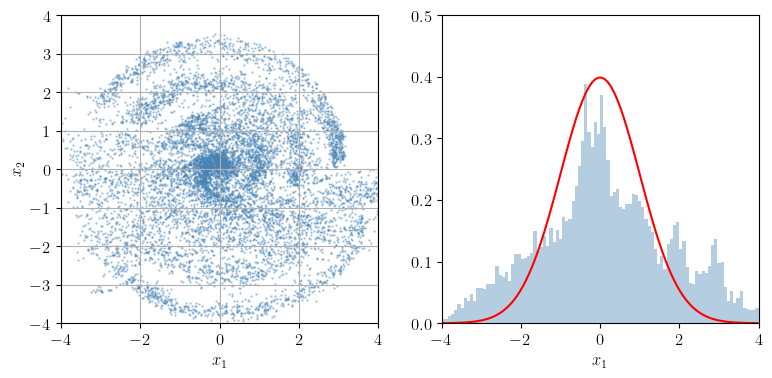

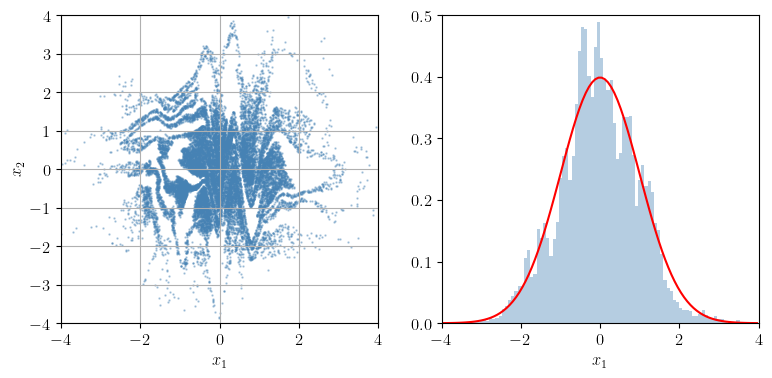

In [33]:
model.load(dictfile)

K = 10000
y = model.sample(K)

x = model.inverse(y).detach().cpu().numpy()
plot_data(x, filename='normal2spiral.png')

Y = model(test_X).detach().cpu().numpy()
plot_data(Y, filename='spiral2normal.png')